In [ ]:
features_csv_path = 'raw_features.csv'
target_variable = 'grade'
drop_columns = ['id', 'grade', 'benchmark', 'start1', 'start2', 'end']

In [ ]:
import numpy as np
import scipy.stats as sps
import pandas as pd
import metadata as md
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv(features_csv_path)

In [ ]:
#df['grade'] = np.vectorize(lambda x : md.grade_int[x])(df['grade'])

In [ ]:
'''
df_train = df.loc[md.train_tf]
df_test = df.loc[md.text_df]

X_train = df_train.drop(columns = drop_columns).to_numpy()
y_train = df_train[target_variable].copy().values
X_test = df_test.drop(columns = drop_columns).to_numpy()
y_test = df_test[target_variable].copy().values
'''

'\ndf_train = df.loc[md.train_tf]\ndf_test = df.loc[md.text_df]\n\nX_train = df_train.drop(columns = drop_columns).to_numpy()\ny_train = df_train[target_variable].copy().values\nX_test = df_test.drop(columns = drop_columns).to_numpy()\ny_test = df_test[target_variable].copy().values\n'

In [ ]:
#'''
X = df.drop(columns = drop_columns).to_numpy()
y = df[target_variable].copy().values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2016, stratify = y)
#'''

In [ ]:
reg = LogisticRegression()

In [ ]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [ ]:
y_test = np.vectorize(lambda x : md.grade_int[x])(['grade'])

In [ ]:
def acc_exact(actual, predicted):
    check = np.absolute(predicted - actual) <= 0.5
    return check.sum()/len(check)
def acc_within_one(actual, predicted):
    check = np.absolute(predicted - actual) <= 1.5
    return check.sum()/len(check)

In [ ]:
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Accuracy rate (exact grade match):', acc_exact(y_test, y_pred))
print('Accuracy rate (within one grade):', acc_within_one(y_test, y_pred))

Mean squared error: 1.9544203195476333
Accuracy rate (exact grade match): 0.3040945691279767
Accuracy rate (within one grade): 0.7488435840328936


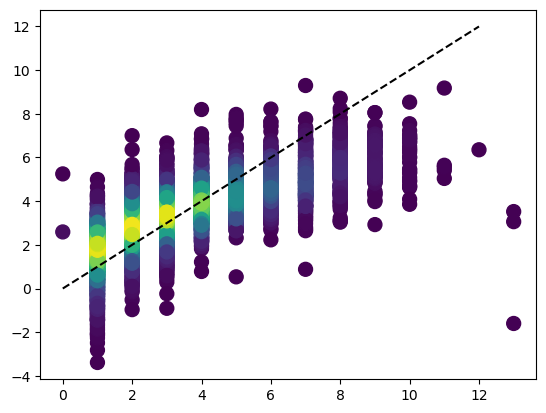

In [ ]:
xy = np.vstack([y_test, y_pred])
z = sps.gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, c=z, s=100)
plt.plot([0, 12], [0, 12], 'k--')
plt.show()